<a href="https://colab.research.google.com/github/sr606/Sentiment_Analysis_of_Covid_19_related_Tweets/blob/main/Copy_of_Sentiment_Analysis_of_Covid_19_related_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

Since the outbreak of coronavirus, it has affected more than 180 countries where massive losses in the economy and jobs globally and confining about 58% of the global population are caused. The research on people’s feelings is essential for keeping mental health and informed about Covid-19.

The given challenge is to build a classification model to predict the sentiment of Covid-19 tweets.

# Data Summary

In [ ]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Storing dataset to dataframe
import numpy as np
import pandas as pd

tweet_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Almabetter /Machine_Learning/Coronavirus Tweets.csv',encoding='ISO-8859-1')

In [ ]:
# Exploring the head of the dataset
tweet_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
# Information of features
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


The dataset have 8 features and one of them has missing values.

The columns and the data it represents are listed below:
1. **UserName**: Coded username.
2. **ScreenName**: Coded screenname.
3. **Location**: Region of origin.
4. **TweetAt**: Tweet timing.
5. **OriginalTweet**: First tweet in the thread.
6. **Sentiment**: Sentiment of the tweet

In [ ]:
# Number of rows in the dataset
print(f"Number of rows in the dataset: {tweet_df.shape[0]}")

Number of rows in the dataset: 41157


In [ ]:
# Classes in target feature
print(tweet_df['Sentiment'].unique())

['Neutral' 'Positive' 'Extremely Negative' 'Negative' 'Extremely Positive']


Target is a multiclass feature.

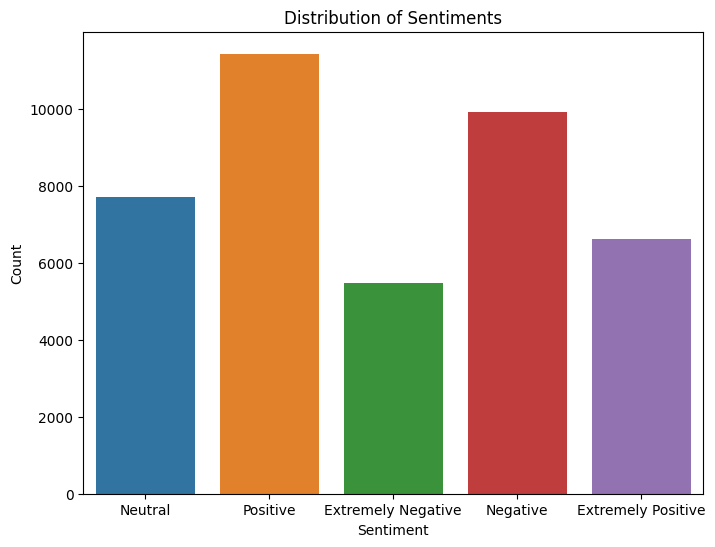

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(data=tweet_df, x='Sentiment')

plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


The dataset is pretty much balanced.

# Data Preprocessing

In [ ]:
# Number of duplicate rows
print(f"Number of duplicate rows: {tweet_df[tweet_df.duplicated()].shape[0]}")

Number of duplicate rows: 0


In [ ]:
# Number and percentage of missing values in the dataset
num = 0
for column in tweet_df.columns:
  count = tweet_df[column].isnull().sum()
  percentage = count/tweet_df.shape[0]*100
  if percentage > 0:
    num += 1
    print(f"{column}: {count}({round(percentage, 2)})%")
if num == 0:
  print("No missing values in the dataframe")

Location: 8590(20.87)%


Since Location is not considered for sentiment analysis, handling of missing values is not necessary.

In [ ]:
# defining a function to remove links from original tweet
def remove_links(tweet):
  words = tweet.split()
  links_removed = [word for word in words if not word.startswith('https://')]
  return ' '.join(links_removed)

In [ ]:
# removing links from original tweet
tweet_df['ModifiedTweet'] = tweet_df.OriginalTweet.apply(lambda x : remove_links(x))

In [ ]:
# Exploring the head of the dataset
tweet_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,ModifiedTweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,@MeNyrbie @Phil_Gahan @Chrisitv and and
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia: Woolworths to give elde...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"Me, ready to go at supermarket during the #COV..."


# Data Visualization

Wordcloud are created to visualize the fequency of different words in each class of Sentiment.

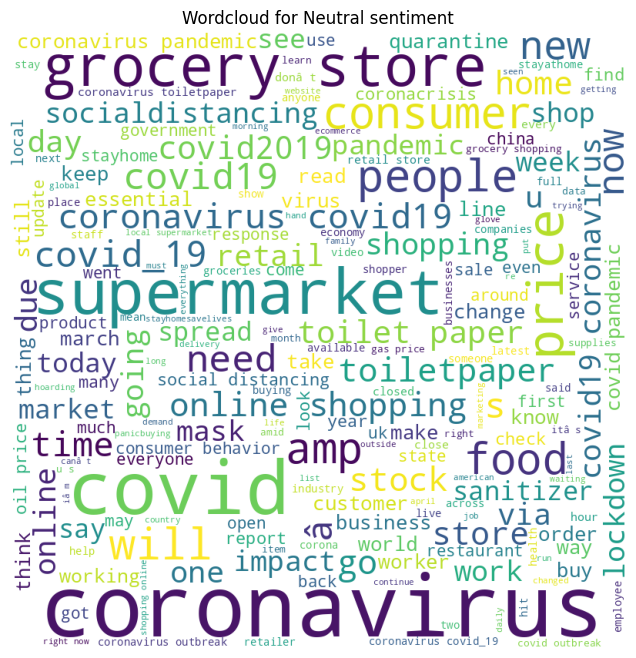

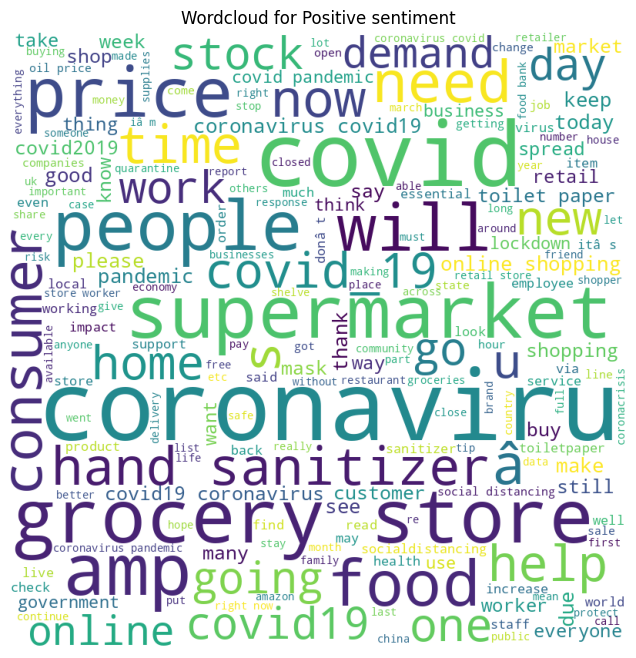

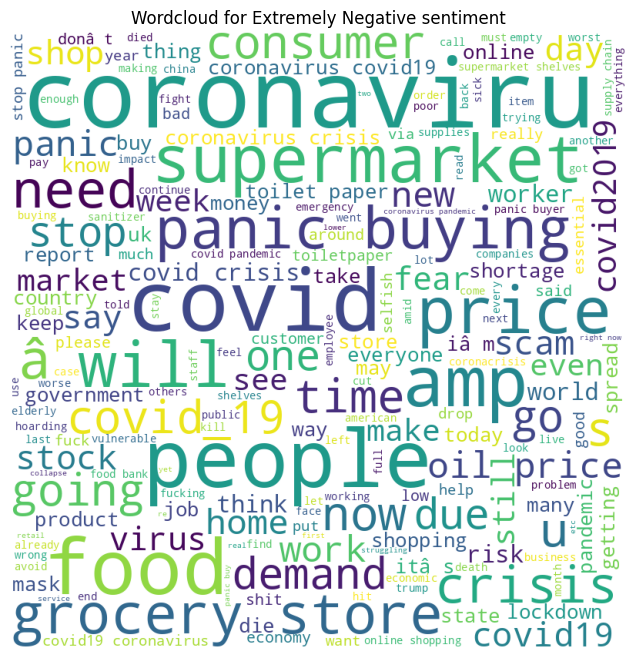

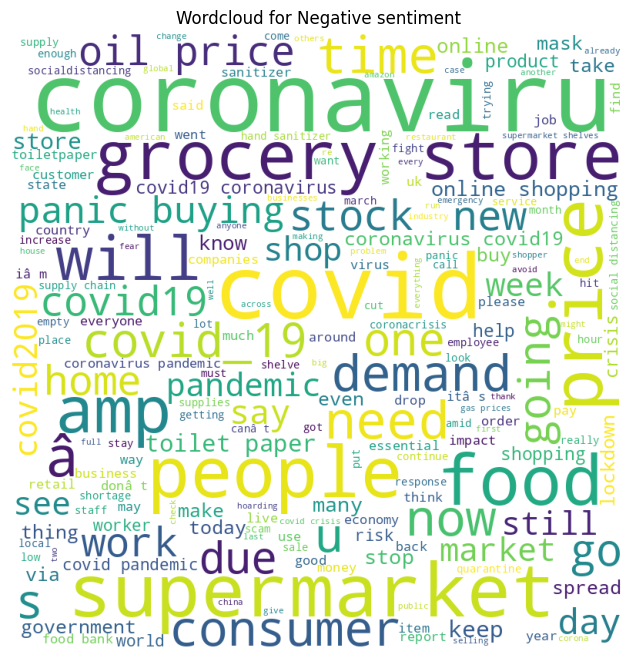

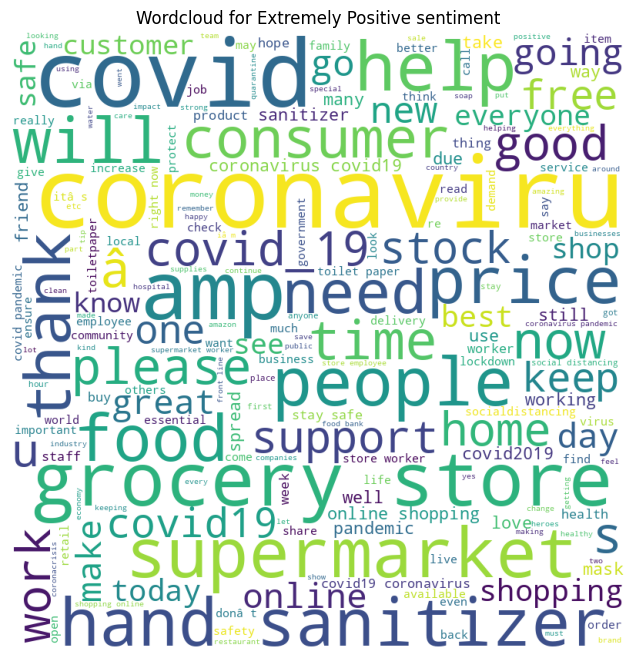

In [ ]:
# Wordcloud of tweets for each sentiment
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

# Unique values in Sentiment
sentiments = tweet_df['Sentiment'].unique()

for sentiment in sentiments:
  comment_words = ''

  for index, row in tweet_df.iterrows():
    if row['Sentiment'] == sentiment:
      # Converting object to string
      mod_tweet = str(row['ModifiedTweet'])

      # Converting all characters to lower case and splitting into words
      mod_tweet = mod_tweet.lower().split()

      # Combining all the words
      comment_words += " ".join(mod_tweet) + " "

  wordcloud = WordCloud(width=800, height=800, background_color='white',
                        stopwords=stopwords, min_font_size=5).generate(comment_words)

  # plot the wordcloud image
  plt.figure(figsize=(8, 8), facecolor=None)
  plt.axis('off')
  plt.title(f'Wordcloud for {sentiment} sentiment')
  plt.imshow(wordcloud)
  plt.show()

# Text Processing

## Text Normalization

Lemmatization is used for text normalization since meaning of words is more crucial than the getting base words to determine which class the text data belongs to.

In [ ]:
# Importing relevant libraries
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
# Initializing relevant variable
wnl = WordNetLemmatizer()
corpus = []

# Loop for text normalization
for tweet in tweet_df.ModifiedTweet:
  # Converting object to string
  mod_tweet = str(tweet)

  # Removing punctuations
  mod_tweet = re.sub('[^a-zA-Z]', ' ', mod_tweet)

  # Converting all characters to lower case and splitting to words
  mod_tweet = mod_tweet.lower().split()

  # Removing stopwords and lemmatizing the words
  mod_tweet = [wnl.lemmatize(word) for word in mod_tweet if word not in stopwords.words('english')]

  # Joining words to form a sentence and adding to corpus
  corpus.append(' '.join(mod_tweet))

In [ ]:
# Printing first 5 stemmed messages
for i in range(5):
  print(corpus[i])

menyrbie phil gahan chrisitv
advice talk neighbour family exchange phone number create contact list phone number neighbour school employer chemist gp set online shopping account po adequate supply regular med order
coronavirus australia woolworth give elderly disabled dedicated shopping hour amid covid outbreak
food stock one empty please panic enough food everyone take need stay calm stay safe covid france covid covid coronavirus confinement confinementotal confinementgeneral
ready go supermarket covid outbreak paranoid food stock litteraly empty coronavirus serious thing please panic cause shortage coronavirusfrance restezchezvous stayathome confinement


## Text Vectorization

TF-IDF is used for feature extraction from text since just the importance of words also needs to be considered.

In [ ]:
# Importing TD-IDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
corpus_matrix = vectorizer.fit_transform(corpus)

# Feature Engineering

In [ ]:
# Removing all features except OriginalTweet and Sentiment
# since all other features are irrelevant to sentiment analysis
tweet_df.drop(['UserName', 'ScreenName', 'Location', 'TweetAt'], axis=1, inplace=True)

In [ ]:
# For better reults lets reduce the number of classes of target feature
# by clubbing together Positive & Extremely Positive and Negative & Extremely Negative
tweet_df.replace({'Extremely Positive':'Positive', 'Extremely Negative':'Negative'}, inplace=True)

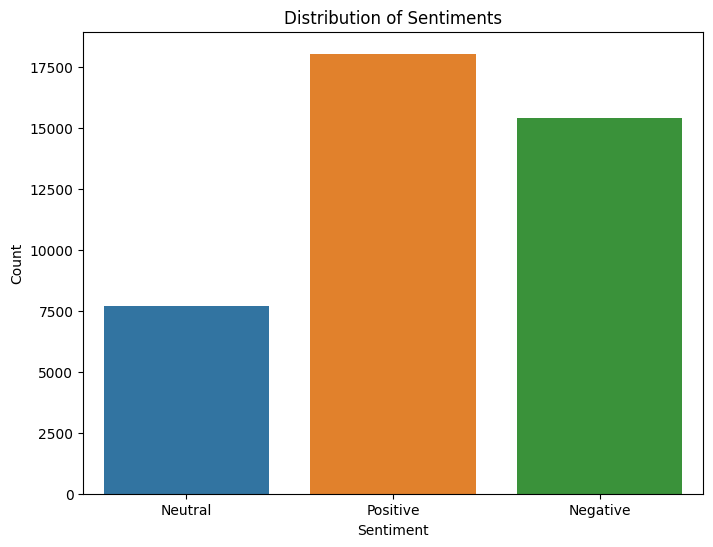

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(data=tweet_df, x='Sentiment')

plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


The number of tweets labelled Neutral are very low compared to Positive and Negative labelled tweets. The dataset is imbalanced.

# Modelling

In [ ]:
# independant feature
X = corpus_matrix

# dependant feature
y = tweet_df['Sentiment']

In [ ]:
# spliting the datasets to training and test data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(30867, 48554)
(30867,)
(10290, 48554)
(10290,)


Lets try 4 different algorithms and find out which one performs the best.

In [ ]:
# Importing cross validation libraries
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# importing model evaluation library
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [ ]:
# create a dataframe to store metrics related to models
metrics_table = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1Score'])

In [ ]:
# defining a function for model evaluation
def model_evaluation(y_test, y_test_pred):
  # calculate model metrics
  accuracy = round(accuracy_score(y_test, y_test_pred) * 100, 6)
  precision = round(precision_score(y_test, y_test_pred, average='weighted') * 100, 6)
  recall = round(recall_score(y_test, y_test_pred, average='weighted') * 100, 6)
  f1Score = round(f1_score(y_test, y_test_pred, average='weighted') * 100, 6)

  # print model metrics
  print()
  print(f"Accuracy  : {accuracy} %")
  print(f"Precision : {precision} %")
  print(f"Recall    : {recall} %")
  print(f"F1 Score  : {f1Score} %")

  # Confusion matrix
  cf_matrix = confusion_matrix(y_test_pred, y_test)
  print("\n")
  sns.heatmap(cf_matrix, annot=True, cmap='Blues')

  # return model evaluation
  return {'Accuracy':accuracy, 'Precision':precision, 'Recall':recall, 'F1_Score':f1Score}

## Logistic Regression

In [ ]:
# Importing logistic regression
from sklearn.linear_model import LogisticRegression

# Hyperparameter tuning
parameters = {'solver':['lbfgs', 'newton-cg', 'saga'],
              'C':[0.01, 0.1, 1],
              'max_iter':[100, 200, 300]}
model_log = RandomizedSearchCV(LogisticRegression(multi_class='multinomial'), parameters, cv=5, n_iter=15)

# Fit dataset to model
model_log.fit(X_train, y_train)

# Model prediction
y_test_pred = model_log.predict(X_test)


Accuracy  : 79.018465 %
Precision : 78.836304 %
Recall    : 79.018465 %
F1 Score  : 78.746341 %




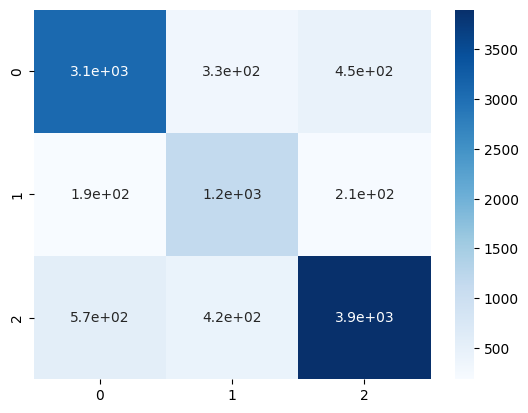

In [ ]:
# model evaluation
evaluation = model_evaluation(y_test, y_test_pred)

# add metrics to metrics table
metrics_table.loc[len(metrics_table.index)] = ['Logistic Regression', evaluation['Accuracy'],
                                               evaluation['Precision'], evaluation['Recall'],
                                               evaluation['F1_Score']]

In [ ]:
# actual vs predicted target data
comparison_Dataframe = pd.DataFrame(zip(y_test, y_test_pred), columns = ['actual', 'pred'])
comparison_Dataframe

,actual,pred
0,Neutral,Neutral
1,Negative,Negative
2,Positive,Negative
3,Positive,Positive
4,Positive,Positive
...,...,...
10285,Negative,Negative
10286,Positive,Neutral
10287,Positive,Positive
10288,Positive,Positive


## Random Forest

In [ ]:
# Importing random forest
from sklearn.ensemble import RandomForestClassifier

# Hyperparameter tuning
parameters = {'max_depth': [5, 10, None],
              'min_samples_leaf': [1, 2, 5],
              'min_samples_split': [2, 5, 10],
              'max_leaf_nodes': [5, 20, 100],
              'max_features': ['auto', 'sqrt', 'log2']}
model_rf = RandomizedSearchCV(RandomForestClassifier(), parameters, cv=5, n_iter=10)

# Fit dataset to model
model_rf.fit(X_train, y_train)

# Model prediction
y_test_pred = model_rf.predict(X_test)


Accuracy  : 48.066084 %
Precision : 55.502552 %
Recall    : 48.066084 %
F1 Score  : 35.071508 %




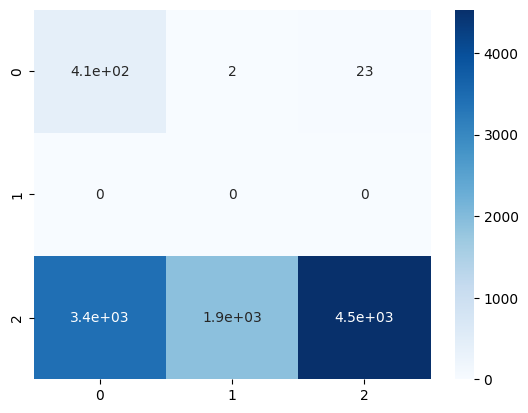

In [ ]:
# model evaluation
evaluation = model_evaluation(y_test, y_test_pred)

# add metrics to metrics table
metrics_table.loc[len(metrics_table.index)] = ['Random Forest', evaluation['Accuracy'],
                                               evaluation['Precision'], evaluation['Recall'],
                                               evaluation['F1_Score']]

In [ ]:
# actual vs predicted target data
comparison_Dataframe = pd.DataFrame(zip(y_test, y_test_pred), columns = ['actual', 'pred'])
comparison_Dataframe

,actual,pred
0,Neutral,Positive
1,Negative,Positive
2,Positive,Positive
3,Positive,Positive
4,Positive,Positive
...,...,...
10285,Negative,Positive
10286,Positive,Positive
10287,Positive,Positive
10288,Positive,Positive


## Naive Bayes

In [ ]:
# Importing complement naive bayes
from sklearn.naive_bayes import ComplementNB

# Defining model
model_nb = ComplementNB()

# Fit dataset to model
model_nb.fit(X_train, y_train)

# Model prediction
y_test_pred = model_nb.predict(X_test)


Accuracy  : 69.387755 %
Precision : 68.737514 %
Recall    : 69.387755 %
F1 Score  : 67.687593 %




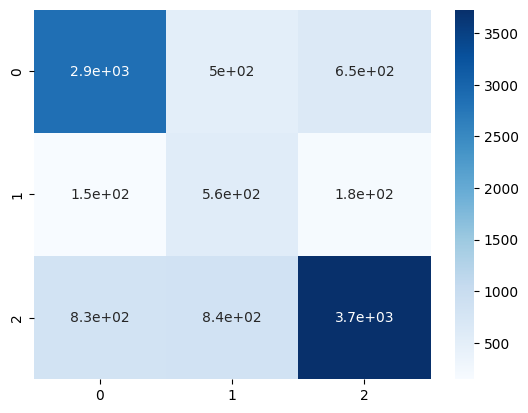

In [ ]:
# model evaluation
evaluation = model_evaluation(y_test, y_test_pred)

# add metrics to metrics table
metrics_table.loc[len(metrics_table.index)] = ['Naive Bayes', evaluation['Accuracy'],
                                               evaluation['Precision'], evaluation['Recall'],
                                               evaluation['F1_Score']]

In [ ]:
# actual vs predicted target data
comparison_Dataframe = pd.DataFrame(zip(y_test, y_test_pred), columns = ['actual', 'pred'])
comparison_Dataframe

,actual,pred
0,Neutral,Positive
1,Negative,Negative
2,Positive,Negative
3,Positive,Positive
4,Positive,Positive
...,...,...
10285,Negative,Positive
10286,Positive,Positive
10287,Positive,Negative
10288,Positive,Positive


## Support Vector Machine

In [ ]:
# Importing SVM
from sklearn.svm import SVC

# Defining model
model_svm = SVC()

# Fit dataset to model
model_svm.fit(X_train, y_train)

# Model prediction
y_test_pred = model_svm.predict(X_test)


Accuracy  : 78.241011 %
Precision : 78.077682 %
Recall    : 78.241011 %
F1 Score  : 77.844858 %




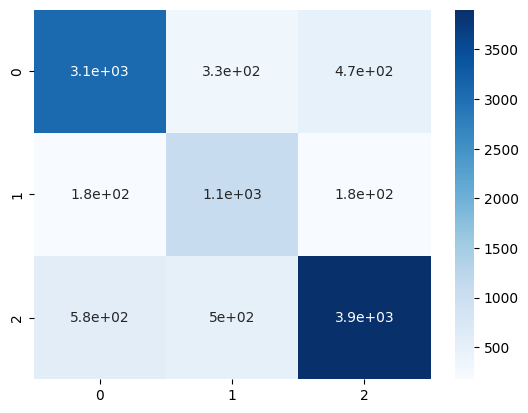

In [ ]:
# model evaluation
evaluation = model_evaluation(y_test, y_test_pred)

# add metrics to metrics table
metrics_table.loc[len(metrics_table.index)] = ['Support Vector Machine', evaluation['Accuracy'],
                                               evaluation['Precision'], evaluation['Recall'],
                                               evaluation['F1_Score']]

In [ ]:
# actual vs predicted target data
comparison_Dataframe = pd.DataFrame(zip(y_test, y_test_pred), columns = ['actual', 'pred'])
comparison_Dataframe

,actual,pred
0,Neutral,Neutral
1,Negative,Negative
2,Positive,Negative
3,Positive,Positive
4,Positive,Positive
...,...,...
10285,Negative,Negative
10286,Positive,Neutral
10287,Positive,Positive
10288,Positive,Positive


# Conclusion

In [ ]:
# print metrics table
metrics_table

,Model,Accuracy,Precision,Recall,F1Score
0,Logistic Regression,79.018465,78.836304,79.018465,78.746341
1,Random Forest,48.066084,55.502552,48.066084,35.071508
2,Naive Bayes,69.387755,68.737514,69.387755,67.687593
3,Support Vector Machine,78.241011,78.077682,78.241011,77.844858


F1 Score is used to compare different models and find out which one is better. Higher the F1 Score, better the model.

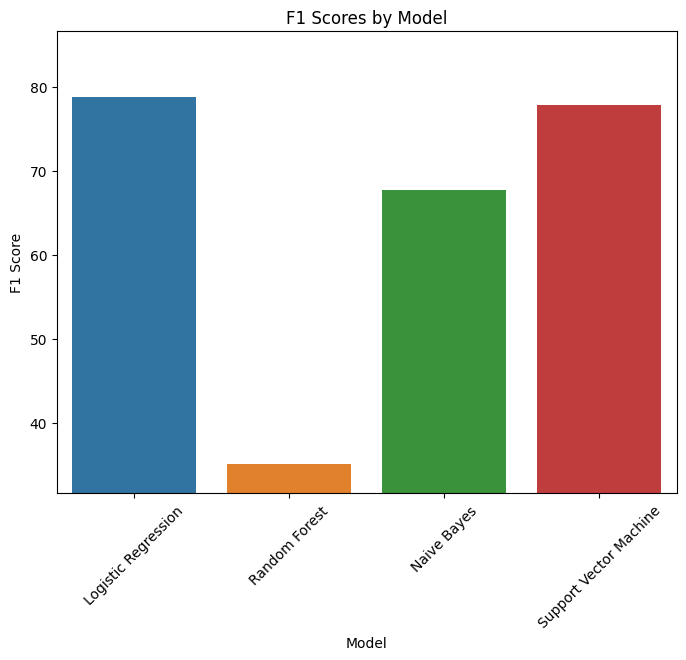

In [50]:


plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='F1Score', data=metrics_table)
plt.ylim(0.9 * metrics_table['F1Score'].min(), 1.1 * metrics_table['F1Score'].max())
plt.xticks(rotation=45)
# Rotate x-axis labels if needed for better visibility
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('F1 Scores by Model')
plt.show()


The model built using logistic regression algorithm has the highest F1 Score, followed by the one using SVM.
Therefore logistic regression model can be used for sentiment analysis.